In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("DATA/Banana2018-23.csv")
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Karnataka,Hassan,Arasikere,Other,Fruits,4,1000,1000,1000,13-Dec-19
1,Karnataka,Chikmagalur,Bagepalli,Banana - Ripe,Fruits,2,700,1100,985,02-Dec-19
2,Karnataka,Mangalore(Dakshin Kannad),Belthangdi,Other,Fruits,2300,1300,1300,1300,04-Mar-21
3,Karnataka,Mangalore(Dakshin Kannad),Belthangdi,Other,Fruits,2950,1300,1300,1300,10-Feb-21
4,Karnataka,Mangalore(Dakshin Kannad),Belthangdi,Other,Fruits,5174,1300,1300,1300,04-Feb-21


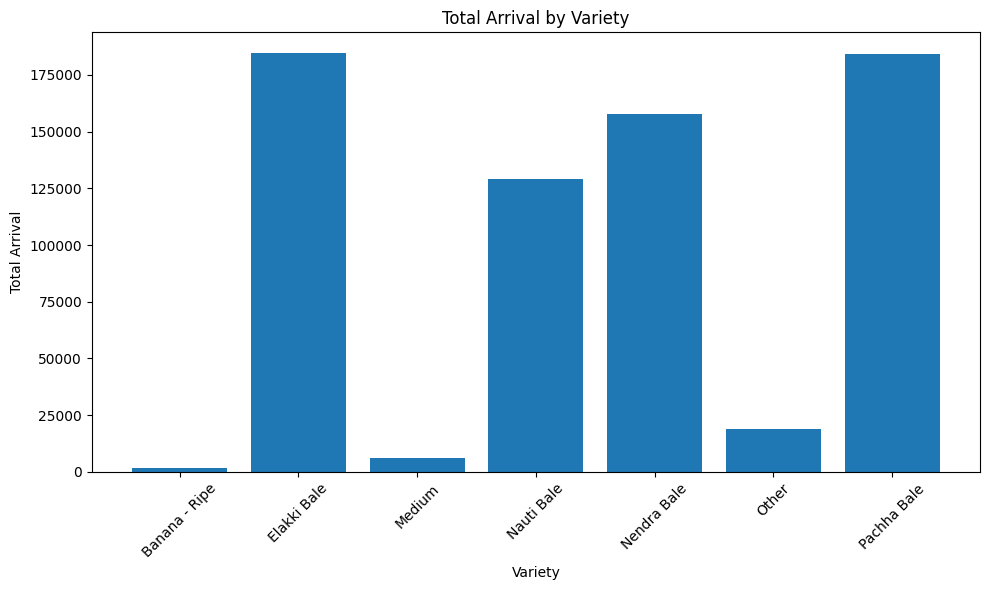

In [2]:
# Group data by Variety and sum the Arrivals
grouped_data = df.groupby('Variety')['Arrival'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Variety'], grouped_data['Arrival'])
plt.xlabel('Variety')
plt.ylabel('Total Arrival')
plt.title('Total Arrival by Variety')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [3]:
import statsmodels.api as sm

# Fit a linear regression model
arrival_this_year = sm.add_constant(df["Arrival"])  # Add a constant (intercept) term
model = sm.OLS(df["MIN"], arrival_this_year).fit()

# Get regression results
regression_summary = model.summary()

# Extract the p-value for the "Arrival" variable
p_value = model.pvalues[1]

# Set the significance level
alpha = 0.05

# Compare p-value to alpha
if p_value <= alpha:
    print("Reject the null hypothesis: Arrival this year has a significant impact on MIN next year.")
else:
    print("Fail to reject the null hypothesis: Arrival this year does not have a significant impact on MIN next year.")

# Output the regression summary (includes coefficient, p-value, and more)
print(regression_summary)

Reject the null hypothesis: Arrival this year has a significant impact on MIN next year.
                            OLS Regression Results                            
Dep. Variable:                    MIN   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     975.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.39e-204
Time:                        12:36:42   Log-Likelihood:                -82230.
No. Observations:                9875   AIC:                         1.645e+05
Df Residuals:                    9873   BIC:                         1.645e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

C:\Users\supri\AppData\Local\Temp\ipykernel_40444\2873153626.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]


In [4]:
df.describe()

,Arrival,MIN,MAX,MODAL
count,9875.000000,9875.000000,9875.000000,9875.000000
mean,69.114532,1449.683646,2809.022886,2137.221165
std,125.279579,1048.729765,1844.072512,1310.360959
min,1.000000,29.000000,29.000000,29.000000
25%,3.000000,700.000000,1600.000000,1200.000000
50%,9.000000,1000.000000,2300.000000,1800.000000
75%,125.000000,1800.000000,3600.000000,2800.000000
max,6300.000000,21000.000000,42000.000000,25750.000000


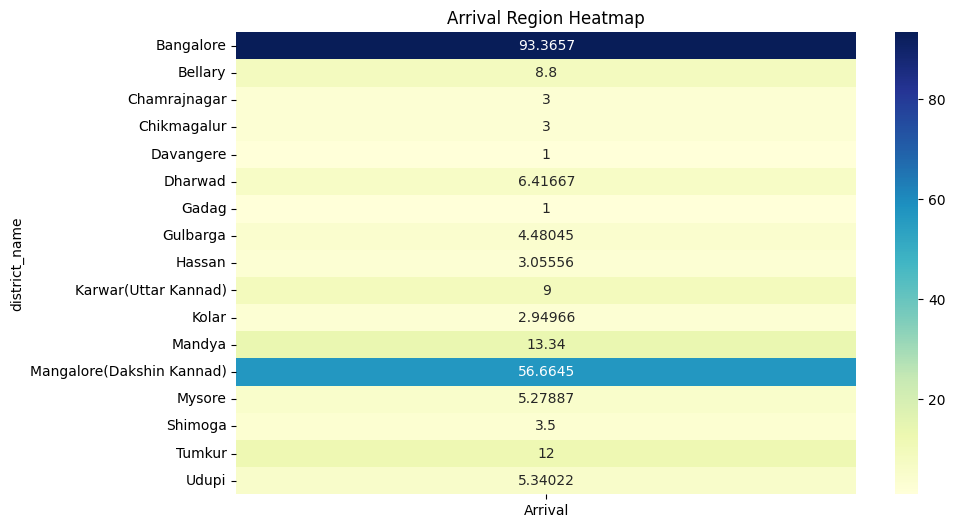

In [5]:
heatmap_data = df.pivot_table(index='district_name', values='Arrival')

# Create the heatmap
plt.figure(figsize=(10, 6))
annot_kws = {'rotation': 0, 'ha': 'center'}
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', annot_kws = annot_kws)
plt.title('Arrival Region Heatmap')
plt.show()

In [6]:
df=df.drop(['state_name','district_name','market_center_name', 'Variety',
       'group_name'],axis=1)
# df.rename(columns=lambda x: x.replace('MODAL', 'Price'), inplace=True)
# df.head()

In [7]:
# df.plot.line(y="MODAL", use_index=True)
# Transforming date to the format yy-mm-dd
def date_trans(date_str):
    if isinstance(date_str, str) and date_str.lower() != "nan":
        i = date_str.split('-')
        return '-'.join([i[2], d[i[1]], i[0]])
import calendar
d = dict(enumerate(calendar.month_abbr))
d = {d[i]:str(i).zfill(2) for i in d if i>0}
df['date_arrival'] = df['date_arrival'].apply(date_trans)
df = df.sort_values(by = 'date_arrival')

# Reducing dataset to mean of each day as a single row, so for 5yrs 365*5 days
df = df.groupby('date_arrival').mean().reset_index()
df.head()

,date_arrival,Arrival,MIN,MAX,MODAL
0,18-10-24,2.000,2800.000000,3800.000000,3400.000000
1,18-10-25,68.600,1240.000000,2420.000000,1810.000000
2,18-10-26,55.125,1175.000000,2100.000000,1650.000000
3,18-10-27,105.000,1166.666667,2366.666667,1775.000000
4,18-10-29,90.000,1200.000000,2300.000000,1716.666667


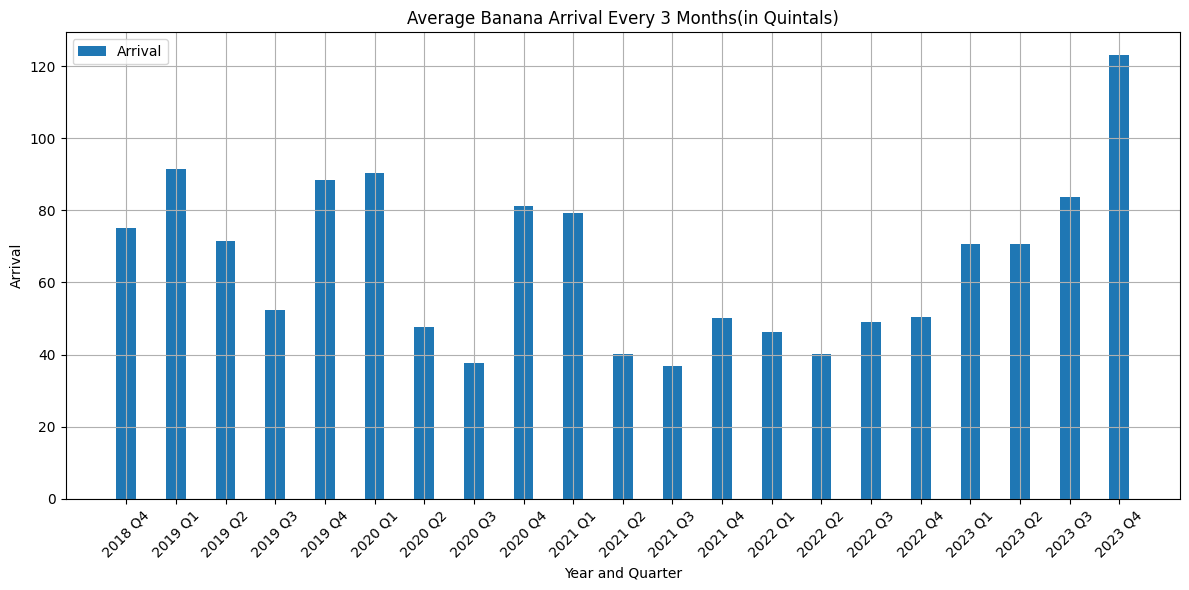

In [9]:
# Convert the date_arrival column to a pandas datetime object with the correct format
df['date_arrival_for_plot'] = pd.to_datetime(df['date_arrival'], format='%y-%m-%d')

# Extract the year and quarter from the date_arrival column
df['Year'] = df['date_arrival_for_plot'].dt.year
df['Quarter'] = (df['date_arrival_for_plot'].dt.month - 1) // 3 + 1

grouped_data = df.groupby(['Year', 'Quarter']).agg({'Arrival': 'mean'}).reset_index()

# Create a bar plot for Arrival
plt.figure(figsize=(12, 6))
x_ticks = []
x_labels = []
for year, quarter in zip(grouped_data['Year'], grouped_data['Quarter']):
    x_ticks.append((year, quarter))
    x_labels.append(f'{year} Q{quarter}')

width = 0.4
plt.bar(range(len(grouped_data)), grouped_data['Arrival'], width=width, label='Arrival', align='center')

plt.xlabel('Year and Quarter')
plt.ylabel('Arrival')
plt.title('Average Banana Arrival Every 3 Months(in Quintals)')
plt.xticks([i for i in range(len(grouped_data))], x_labels, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

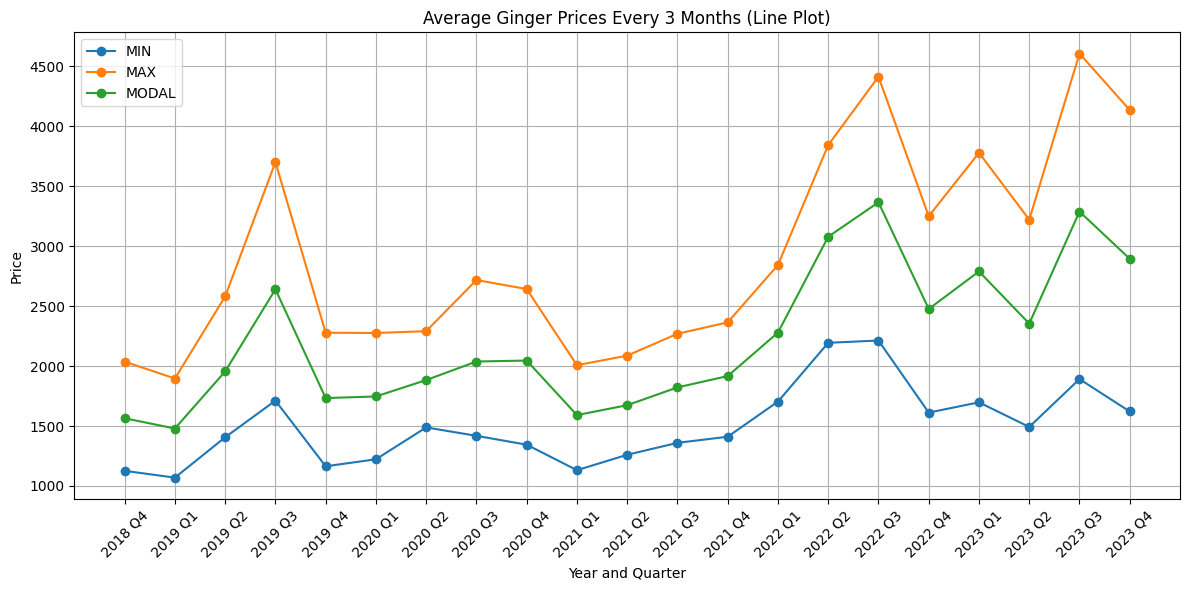

In [10]:
# plot min, max, modal prices


# Group the data by year and quarter and calculate the mean values for each quarter
grouped_data = df.groupby(['Year', 'Quarter']).agg({'MIN': 'mean', 'MAX': 'mean', 'MODAL': 'mean'}).reset_index()

# Create a line plot for MIN, MAX, and MODAL prices
plt.figure(figsize=(12, 6))

# Plot lines for MIN, MAX, and MODAL
plt.plot(range(len(grouped_data)), grouped_data['MIN'], label='MIN', marker='o')
plt.plot(range(len(grouped_data)), grouped_data['MAX'], label='MAX', marker='o')
plt.plot(range(len(grouped_data)), grouped_data['MODAL'], label='MODAL', marker='o')

# Customize x-axis labels
x_ticks = [i for i in range(len(grouped_data))]
x_labels = [f'{year} Q{quarter}' for year, quarter in zip(grouped_data['Year'], grouped_data['Quarter'])]
plt.xticks(x_ticks, x_labels, rotation=45)

plt.xlabel('Year and Quarter')
plt.ylabel('Price')
plt.title('Average Ginger Prices Every 3 Months (Line Plot)')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the line plot
plt.show()

In [10]:
# df["Tomorrow"] = df["Price"].shift(-1)
# df["Target"] = (df["Tomorrow"] > df["Price"]).astype(int)
# df.set_index('date(y-m-d)',inplace=True)


In [11]:
df1=df.reset_index()['MODAL']

In [12]:
df1

0       3400.000000
1       1810.000000
2       1650.000000
3       1775.000000
4       1716.666667
           ...     
1560    2750.000000
1561    2740.000000
1562    2240.000000
1563    2778.571429
1564    2500.000000
Name: MODAL, Length: 1565, dtype: float64

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(1017, 548)

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
y_train

array([0.14285714, 0.29333333, 0.22666667, ..., 0.17259259, 0.16083333,
       0.15333333])

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 6s 86ms/step - loss: 0.0130 - val_loss: 0.0208
Epoch 2/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0057 - val_loss: 0.0140
Epoch 3/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0049 - val_loss: 0.0187
Epoch 4/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0047 - val_loss: 0.0155
Epoch 5/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0046 - val_loss: 0.0143
Epoch 6/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0045 - val_loss: 0.0121
Epoch 7/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0044 - val_loss: 0.0105
Epoch 8/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0044 - val_loss: 0.0091
Epoch 9/100
16/16 [==============================] - 0s 22ms/step - loss: 0.0044 - val_loss: 0.0090
Epoch 10/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0044 - val_loss: 0.0084

In [29]:
import tensorflow as tf


In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 0s 6ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1999.0930941394467

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2754.4142569358246

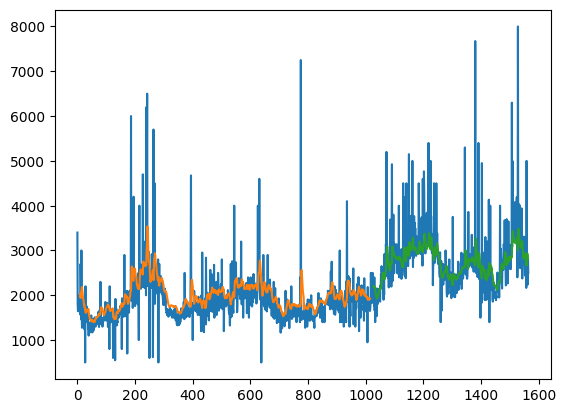

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

548

In [37]:
x_input=test_data[538:].reshape(1,-1)
x_input.shape

(1, 10)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.29474205]
11
[0.29474205]
12
[0.29474205]
13
[0.29474205]
14
[0.29474205]
15
[0.29474205]
16
[0.29474205]
17
[0.29474205]
18
[0.29474205]
19
[0.29474205]
20
[0.29474205]
21
[0.29474205]
22
[0.29474205]
23
[0.29474205]
24
[0.29474205]
25
[0.29474205]
26
[0.29474205]
27
[0.29474205]
28
[0.29474205]
29
[0.29474205]
30
[0.29474205]
31
[0.29474205]
32
[0.29474205]
33
[0.29474205]
34
[0.29474205]
35
[0.29474205]
36
[0.29474205]
37
[0.29474205]
38
[0.29474205]
39
[0.29474205]
40
[[0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.29474204778671265], [0.2947420477

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
import matplotlib.pyplot as plt
len(df1)

1565

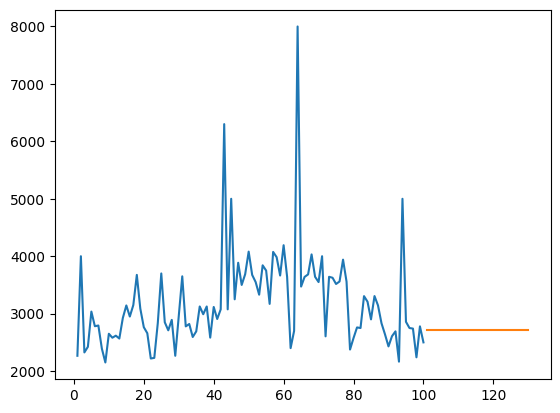

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1465:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

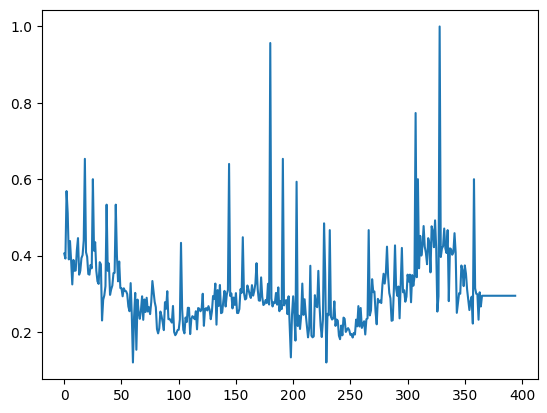

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()


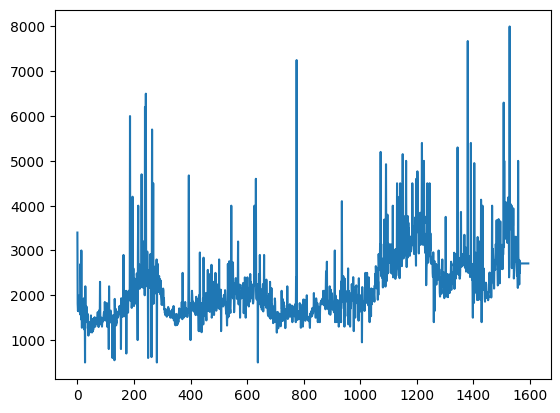

In [45]:
plt.plot(df3)


NameError: name 'WindowSlider' is not defined